#20-10-202

In [ ]:
what is K-mean clustering in simple words ? 

K-means clustering tries to group similar kinds of items in form of clusters.It fins the 
similarity between  the items and groups them into the clusters. K-means clustering alogorithm works.

In [ ]:
why KMeans is used ?

The K-means clustering algorithm is used to find groups which have not been explicity labeled
in the data. This can be used to confirm business assumptions about what type of groups exist or 
to identify unknown groups in complex data sets.

The elbow method runs K-means clustering on the dataset for a range of values for K (say from 1-10)
and then for each value of K computes an average score for all clusters. By default ,the distortion
score is computed,the sum of square distance from each point to its assigned center.

In [ ]:
what is the purpose of random_state parameters ?

Basically. by setting the random_state , you guarantee that the (pseudo) random number generator
generates the same sequence of random integers each time, which in turn has an effect on the way
your data is sampled.

In [ ]:
what is elbow method?

Elbow Method

The KElbowVisualizer implements the "elbow" method to help data scientists select the optimal
number of clusters by fitting the model with a range of values for 

if the line chart resemble an arm. then the "elbow"(the point of inflection on the curve)
is a good indication that the underlying model fits best at that point.In the visualizer "elbow"
will be annotated with a ashed line.


In [ ]:
what is the meaning of inertia_ ?

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the 
distance between each data point and its centrold,squaring this distance, and summing these squares 
across one cluster.A good model is one with low inertia AND a low number of clusters (K ).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import  KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\\Users\\GOURAV NEGI\\Downloads\\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.drop('Genre', inplace=True, axis =1)

Text(0.5, 1.0, 'customer Data')

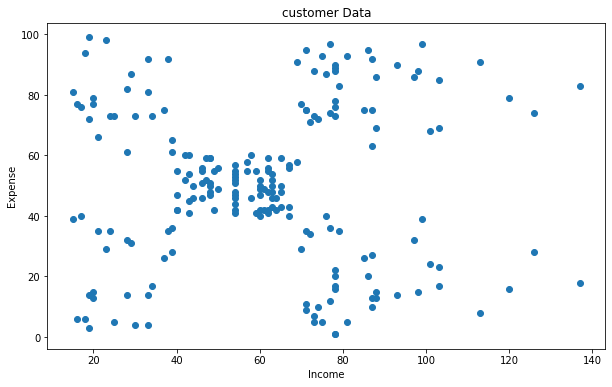

In [6]:
#plot data points
plt.figure(figsize = (10,6))
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'])
plt.xlabel('Income')
plt.ylabel('Expense')
plt.title('customer Data')

In [7]:
individual_clustering_score = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = 1,init = 'random' , random_state = 42)
    kmeans.fit(df)
    individual_clustering_score.append(kmeans.inertia_)

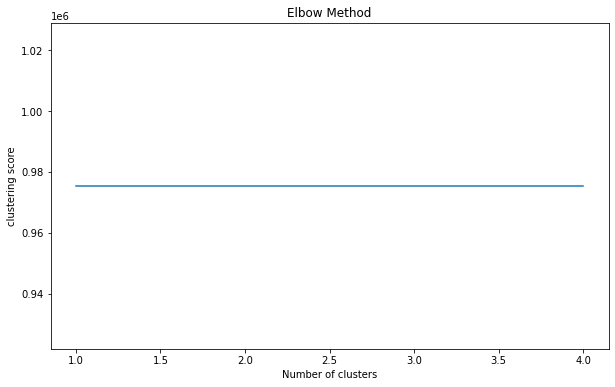

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('clustering score')
plt.show()

In [11]:
individual_clustering_score

[975462.7799999998, 975462.7799999998, 975462.7799999998, 975462.7799999998]

In [12]:
# Fit the model and predict 
kmeans = KMeans(n_clusters = 2, random_state = 42)

kmeans.fit(df)


KMeans(n_clusters=2, random_state=42)

In [13]:
pred = kmeans.predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [14]:
# Adding cluster column to main data.

df['Cluster'] = pd.DataFrame(pred, columns = ['Cluster'])
df

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,1
198,199,32,137,18,1


In [26]:
import seaborn as sns

In [ ]:
# hue argument to provide a factor variable

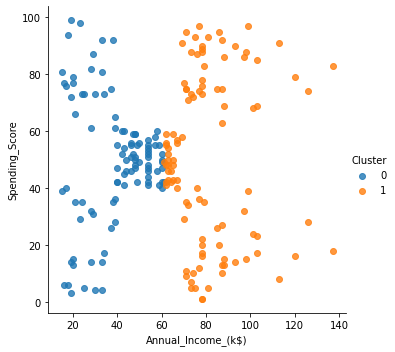

In [29]:
sns.lmplot(x = 'Annual_Income_(k$)',y = 'Spending_Score',data = df, fit_reg = False, hue ='Cluster',legend =True)